### t2.small, AWS Marketplace -> Anaconda with Python 3

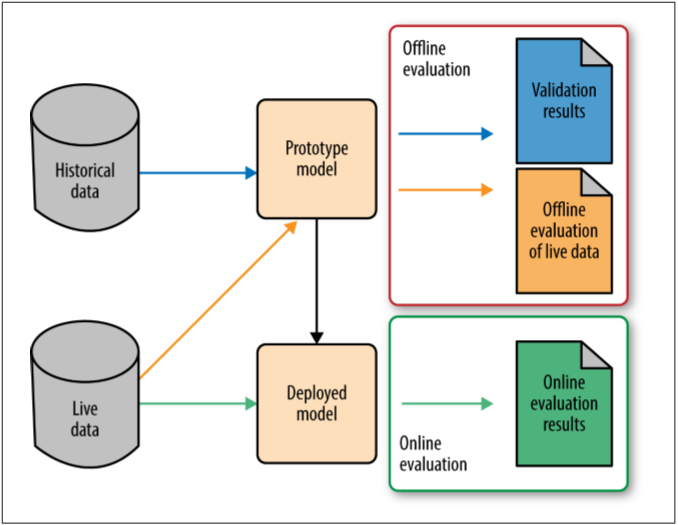

In [2]:
from IPython.display import Image
Image(filename='OnlineOfflineEvaluation.png')

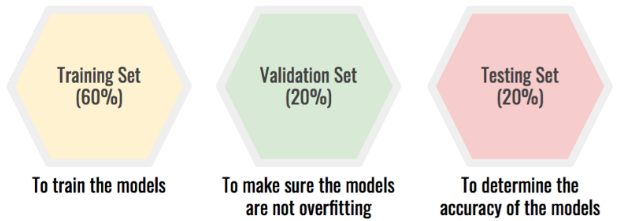

In [3]:
from IPython.display import Image
Image(filename='TrainingValidationTesting.png')

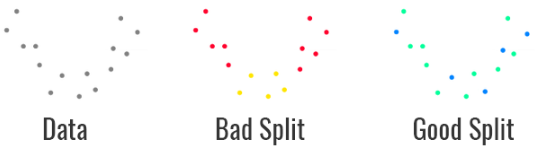

In [4]:
from IPython.display import Image
Image(filename='ShuffleDataToBalanceData.png')

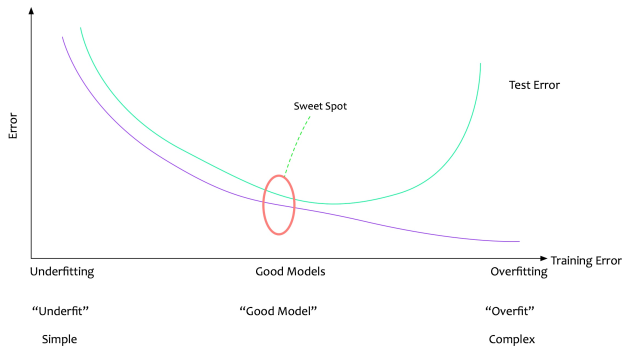

In [5]:
from IPython.display import Image
Image(filename='OptimalModel.png')

### 1) Accuracy

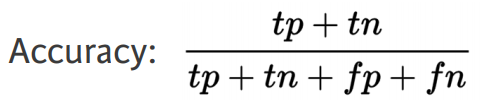

In [12]:
from IPython.display import Image
Image(filename='Accuracy.png')

### Accuracy Paradox

-  The accuracy paradox is the paradoxical finding that accuracy is not a good metric for predictive models when classifying in predictive analytics.
-  This is because a simple model may have a high level of accuracy but be too crude to be useful.
-  For example, if the incidence of category A is dominant, being found in 99% of cases, then predicting that every case is category A will have an accuracy of 99%.
-  Precision and recall are better measures in such cases.
-  The underlying issue is that class priors need to be accounted for in error analysis.
-  Precision and recall help, but precision too can be biased by very unbalanced class priors in the test sets.

### 2) Confusion Matrix

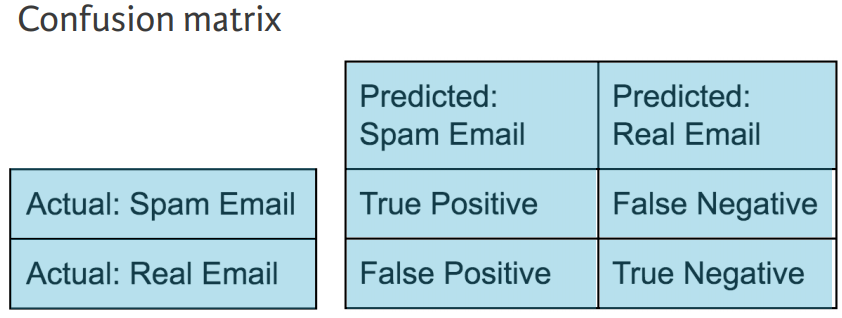

In [10]:
from IPython.display import Image
Image(filename='Confusion.png')

-  True positives : The model predicts an observation belongs to a class and it does.
-  True negatives : The model predicts an observation does not belong to a class and it does not.
-  False positives : The model predicts an observation belongs to a class when it does not.
-  False negatives : The model predicts an observation does not belong to a class when it does.

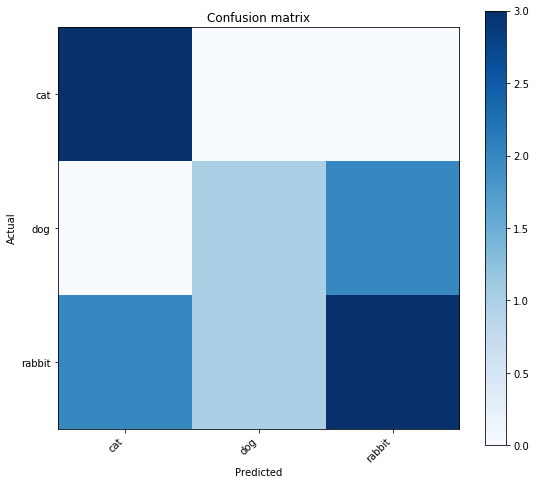

In [4]:
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix

y_true = ['rabbit', 'cat', 'rabbit', 'rabbit', 'cat',    'dog', 'dog', 'rabbit', 'rabbit', 'cat',    'dog', 'rabbit']
y_pred = ['cat'   , 'cat', 'rabbit',    'dog', 'cat', 'rabbit', 'dog',    'cat', 'rabbit', 'cat', 'rabbit', 'rabbit']

ConfusionMatrix(y_true, y_pred).plot(cmap=plt.cm.Blues)
plt.colorbar()

### 3) Receiver Operating Characteristic

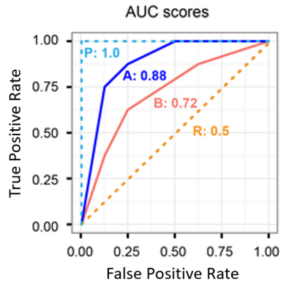

In [9]:
from IPython.display import Image
Image(filename='AUCScores.png')

-  A perfect machine learning model will have an AUC of 1.0 (cyan).
-  A random model will have an AUC of 0.5 (orange). 
-  A good model will be over 0.7.
-  A great model will be over 0.85. 
-  It is not possible to perfectly classify a data set, but the AUC is a good way to compare models and give a sense of how trustworthy the model is.

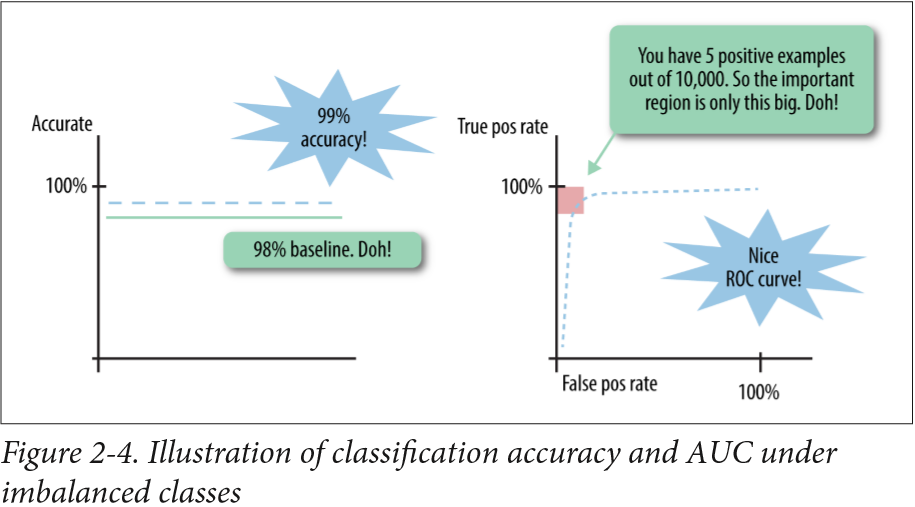

In [13]:
from IPython.display import Image
Image(filename='ImbalancedClasses.png')

Area Under Curve (summary of model skill): 0.681


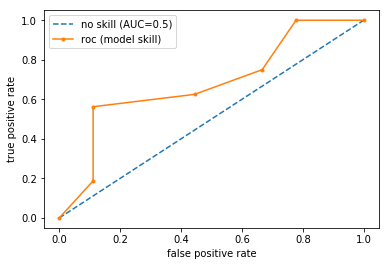

In [19]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

X, y = make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y)

probabilities = KNeighborsClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probabilities)

pyplot.plot([0, 1], linestyle='--',                              label='no skill (AUC=0.5)')
pyplot.plot(false_positive_rate, true_positive_rate, marker='.', label='roc (model skill)')
pyplot.xlabel('false positive rate')
pyplot.ylabel('true positive rate')
pyplot.legend()

print('Area Under Curve (summary of model skill): %.3f' % roc_auc_score(y_test, probabilities))

### 4) Precision-Recall Curve

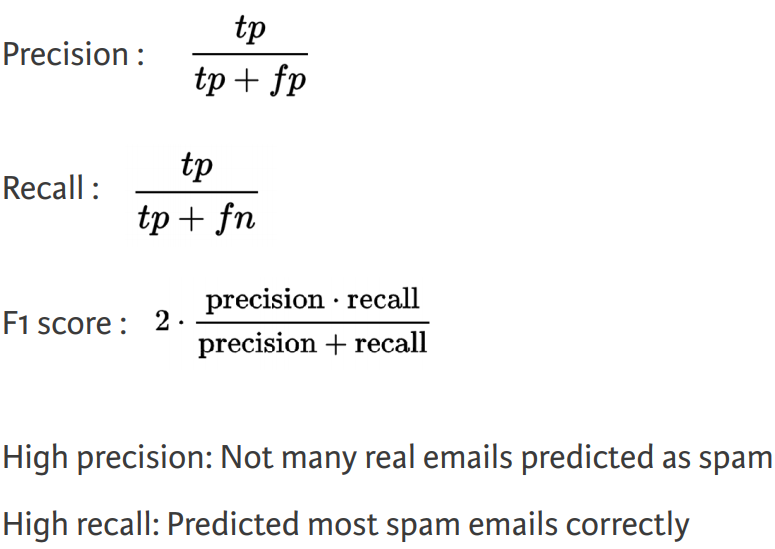

In [7]:
from IPython.display import Image
Image(filename='PrecisionRecallF1.png')

F-measure:            0.857
Area Under the Curve: 0.948
Average Precision:    0.922


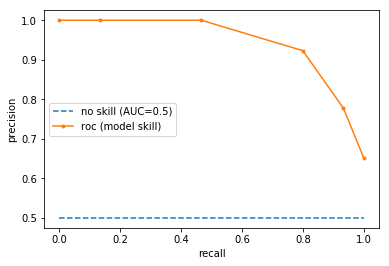

In [29]:
from matplotlib import pyplot
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y)

model         = KNeighborsClassifier().fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]
predictions   = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

pyplot.plot([0.5, 0.5], linestyle='--',    label='no skill (AUC=0.5)')
pyplot.plot(recall, precision, marker='.', label='roc (model skill)')
pyplot.xlabel('recall')
pyplot.ylabel('precision')
pyplot.legend()

print('F-measure:            %.3f' % (f1_score(y_test, predictions)))
print('Area Under the Curve: %.3f' % (auc(recall, precision)))
print('Average Precision:    %.3f' % (average_precision_score(y_test, probabilities)))

### 5) Learning Curve

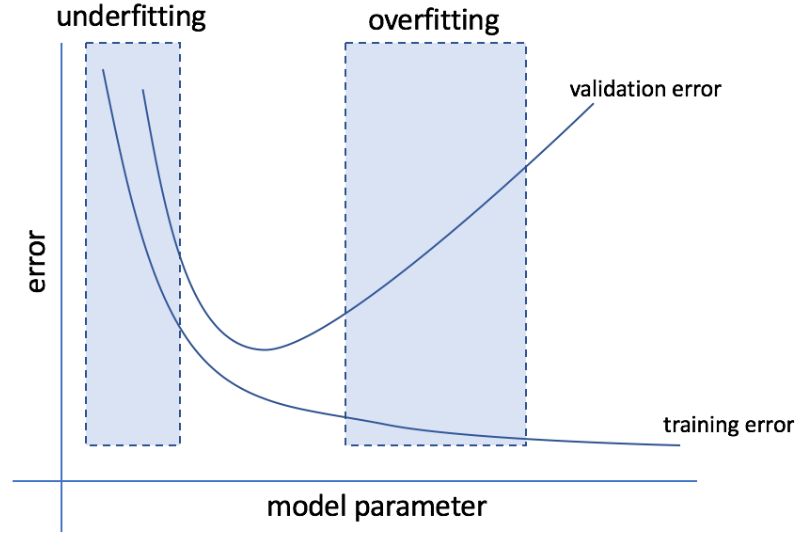

In [14]:
from IPython.display import Image
Image(filename='ValidationCurve_01.png')

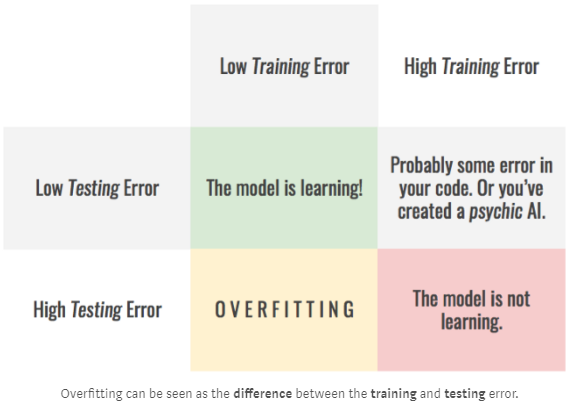

In [15]:
from IPython.display import Image
Image(filename='ValidationCurve_02.png')

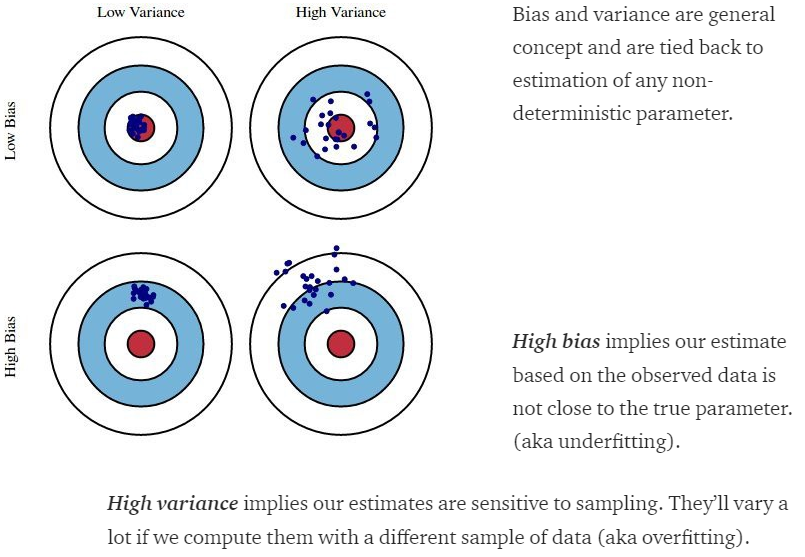

In [19]:
from IPython.display import Image
Image(filename='BiasVariance.png')

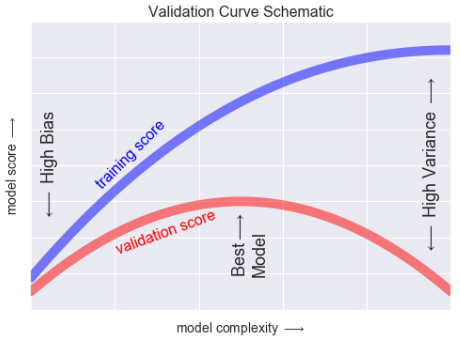

In [20]:
from IPython.display import Image
Image(filename='ValidationCurve_03.png')

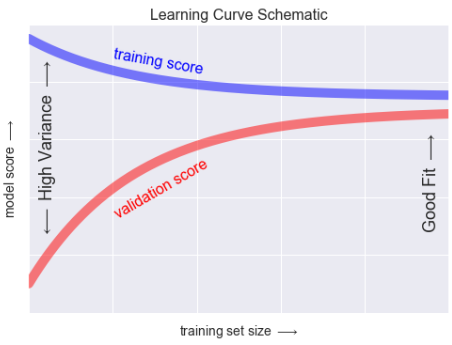

In [21]:
from IPython.display import Image
Image(filename='ValidationCurve_04.png')